# Linear Model
## Linear Regression

### 최소 제곱법(Least Sqaure), 실습 - 직접구현

a:6.6, b:22.900000000000006


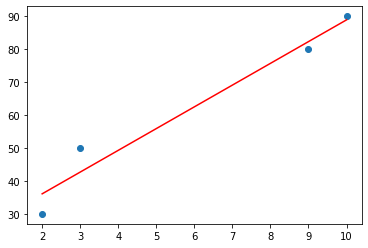

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([10,9,3,2]) 
y = np.array([90,80,50,30])

plt.plot(X, y, 'o')

a = np.sum( (X-X.mean()) * (y-y.mean())) /  np.sum( (X-X.mean())**2 )
b = y.mean() - a*X.mean()
print(f"a:{a}, b:{b}")

plt.plot(X, X*a+b, 'r-' )

####  Scikit-learn API
* `sklearn.linear_model.LinearRegression(fit_intercept, normalize)`
    * OLS(Oerdinary Least Sqaures) 최소 제곱 추정 방식 구현
    * `fit_intercept=True` : bias 사용 여부
    * `normalize = False` : 수행 전에 입력 데이타 정규화, `fit_inercept=False`인 경우 무시
    * `coef_` :  W 계수
    * `intercept_` : bias 절편

In [255]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape(-1,1), y)
print(lr.coef_, lr.intercept_)

[6.6] 22.899999999999977


### Gradient Descent, 실습
#### 샘플 데이타 생성
* 단순화 하기 위해서 계수 1개만으로 제한
* m개의 샘플 데이타를 만든다.
* X 데이타 : np.arange(m) 
    * 0 ~ m
* y 데이타 : X * 2
    * 데이타가 너무 정직해서 약간의 노이즈를 추가

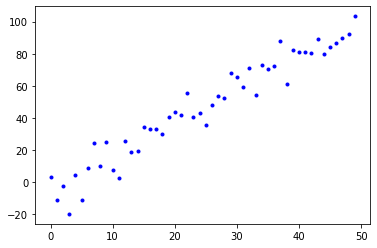

In [1]:
import random
import numpy as np
import matplotlib.pylab as plt

m = 50 #sample count
X = np.arange(m)
y = X  * 2 # W = 2, b=0(bias 생략) 
y = y + 10 * np.random.randn(m) # adding noise

plt.plot(X, y, 'b.')

#### 선형 회귀 표시
* 데이타의 선회 회귀를 직선으로 표시
* 최종적으로 이 선을 만족하는 W를 찾으면 성공

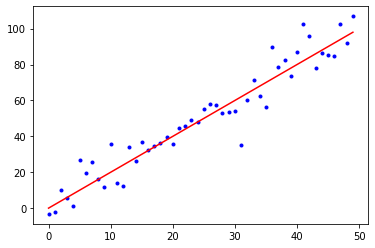

In [262]:
plt.plot(X, y, 'b.')
plt.plot(X, X*2, 'r')

#### Hypothesis와 Cost함수

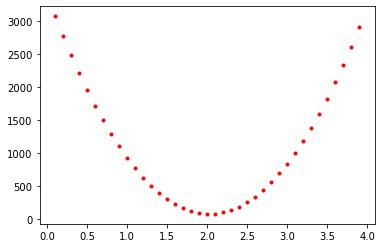

In [263]:
w_range = np.arange(0.1, 4, 0.1) 
costs = np.array([])
for i, w in enumerate(w_range):
    h = w*X
    cost = 1/m * np.sum( (h - y)**2)
    costs = np.append(costs, cost)
    #plt.plot(w, cost, 'r.')
plt.plot(w_range, costs, 'r.')

#### Cost 함수와 Gradient

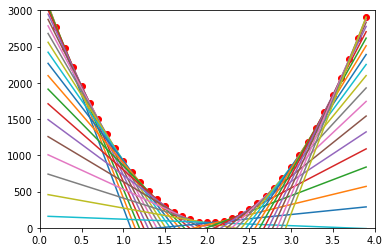

In [264]:
import time
plt.plot(w_range, costs, 'ro')
for w, cost in zip(w_range, costs):
    h = w*X
    gradient =  2/m * np.sum( (h-y) * X)
    #plt.plot(w_range, gradient *w_range + cost)
    plt.plot(w_range, gradient*(w_range-w) +cost) #gradient는 x=0을 기준으로 계산되었기 때문에 
    plt.axis([0, 4, 0, 3000])


#### Batch Gradient Descent
* 전체 샘플에 대해서 경사 하강법을 이용해서 예측

initial W 0.20710861867747699
epoch: 0  cost: 2752.679108074776  gradient: -2943.6430612680115  W: 0.35429077174087753
epoch: 20  cost: 165.26005491721594  gradient: -545.2717251423913  W: 1.71759504731284
epoch: 40  cost: 76.4785641336414  gradient: -101.00451992697968  W: 1.9701294948538084
epoch: 60  cost: 73.43222608641439  gradient: -18.7097782174859  W: 2.0169082282132895
epoch: 80  cost: 73.32769781800982  gradient: -3.465743921168869  W: 2.025573382278509
epoch: 100  cost: 73.32411116455043  gradient: -0.641984142596582  W: 2.0271784897617957
epoch: 120  cost: 73.32398809656857  gradient: -0.11891924179089301  W: 2.0274758151196037
epoch: 140  cost: 73.32398387376635  gradient: -0.02202824825321386  W: 2.027530890788565
epoch: 160  cost: 73.32398372887036  gradient: -0.004080447484834622  W: 2.0275410928424153
epoch: 180  cost: 73.32398372389856  gradient: -0.0007558500101617938  W: 2.027542982640665
epoch: 200  cost: 73.32398372372796  gradient: -0.00014001141759763415  W: 2.0

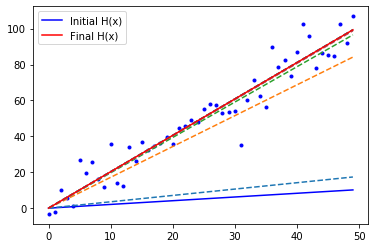

In [265]:
plt.plot(X, y, 'b.')

W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)

learning_rate = 0.00005
suspend = 0.00001
old_g = None
epochs = 1000
for epoch in range(epochs):
    hypothesis = W * X 
    loss = hypothesis - y
    cost = 1/m * np.sum(loss**2)
    gradient =  2/m * np.sum(loss * X)
    if old_g is not None and abs(gradient - old_g) < suspend:
        print('suspended:', epoch)
        break
    old_g = gradient
    W = W - learning_rate * gradient
    if epoch %20 == 0:
        print('epoch:',epoch,' cost:',cost,' gradient:',gradient, ' W:', W)
        plt.plot(X, W*X, '--')
print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()


#### Stochastic Gradient Descent


initial W 0.012120147612416976
epoch: 0 cost: 4.000398499291783e+25  gradient: 427890451535888.25  W: -4091922147092.525 learn_rate: 0.01
epoch: 5 cost: 8.226530034424558e+70  gradient: -1.576201786065546e+37  W: 9.264099901544187e+33 learn_rate: 0.00125
epoch: 10 cost: 1.3090994681934103e+64  gradient: 7.599833454536571e+33  W: -1.6214815409195586e+30 learn_rate: 0.0006666666666666666
epoch: 15 cost: 7.726593632696442e+18  gradient: -211752138523.47278  W: 23273258.95712109 learn_rate: 0.00045454545454545455
epoch: 20 cost: 54.51970773187883  gradient: 207.64820790778523  W: 2.099419912380584 learn_rate: 0.0003448275862068965
epoch: 25 cost: 61.92305287016698  gradient: 254.38401200112696  W: 1.9540968185587952 learn_rate: 0.0002777777777777778
epoch: 30 cost: 35.93563204704003  gradient: -196.5076774847297  W: 2.0206619348531616 learn_rate: 0.00023255813953488373
epoch: 35 cost: 119.55744033199979  gradient: -34.32401321852522  W: 2.0681232827453275 learn_rate: 0.0002
epoch: 40 cost:

[0, 50, 0, 100]

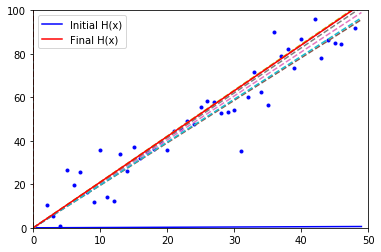

In [268]:
plt.plot(X, y, 'b.')

W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)

t0, t1 = 1, 100
epochs = 50
batches = 5
for epoch in range(epochs):
    for i in range(int(m/batches)):
        random_i = np.random.randint(0,m, (batches,))
        xi = X[random_i]
        yi = y[random_i]
        h = W*xi
        cost = 1/batches* np.sum((h-yi)**2)
        gradient = 2/batches* np.sum((h-yi) * xi)
        learning_rate = t0/(t1 + (epoch * (m + i*10)))
        #learning_rate = 0.0005
        W = W - learning_rate * gradient
    if epoch %5 ==0:
        print('epoch:',epoch, 'cost:', cost,' gradient:',gradient, ' W:', W, 'learn_rate:', learning_rate)
        plt.plot(X, W*X, '--')
print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()
plt.axis([0, 50, 0, 100])

#### Scikit-learn API


W: [0.88422094] b: [-0.00092508]


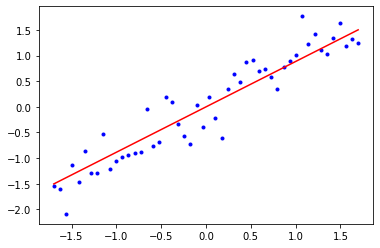

In [61]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

import random
import numpy as np
import matplotlib.pylab as plt

m = 50 #sample count
X = np.arange(m, dtype=np.float32).reshape(-1,1)
y = X  * 2 # W = 2, b=0(bias 생략) 
y = y + 10 * np.random.randn(m,1) # adding noise

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

plt.plot(X, y, 'b.')

lr = SGDRegressor(verbose=0)
lr.fit(X, y.ravel())
W = lr.coef_
b = lr.intercept_
print('W:', W, 'b:', b)
plt.plot(X, W.ravel()*X + b, 'r-')

#### 보스톤 주택가격, 회귀 예제


In [13]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = df['PRICE']
X_data = df.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(f'train score:{lr.score(X_train, y_train):.2f}, , test score:{lr.score(X_test, y_test):.2f}')

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f'MSE:{mse:.3f}, RMSE:{rmse:.3f}, R2:{r2:.3f}')

print('coef:', ["{:.3f}".format(x) for x in lr.coef_])
print('bias:', lr.intercept_)

train score:0.71, , test score:0.78
MSE:19.831, RMSE:4.453, R2:0.784
coef: ['-0.099', '0.061', '0.059', '2.440', '-21.470', '2.796', '0.004', '-1.516', '0.308', '-0.011', '-1.005', '0.006', '-0.569']
bias: 46.39649387182378


###  다항 회귀(Polynomial Variable Regression)
* 2차식 변환

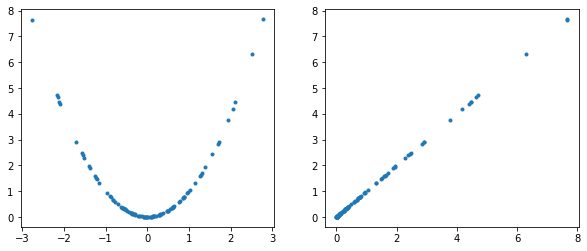

In [10]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randn(100)
y = x**2

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, y, '.')

x2 =  x**2 
plt.subplot(1,2,2)
plt.plot(x2, y, '.')

#### 관련 함수

In [197]:
import numpy as np

x = [2,3]
p = np.array([2,3,1]) 
polyval = np.polyval(p, x)
print("polyval", polyval) # 2 * 2^2 + 3* 2 + 1, 2 * 3^2 + 3*3 + 1

polyfit = np.polyfit(x, polyval, 2)
print("polyfit", polyfit)

polyval [15 28]
polyfit [1.97773279 3.11133603 0.86639676]


c:\python37\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


#### 다항식 샘플 생성

(100, 1) (100, 1) [1.05804829] [9.37923845]


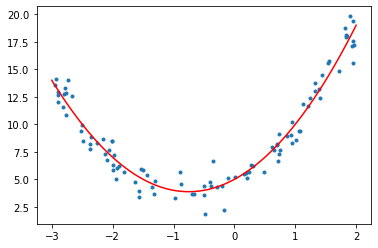

In [176]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

m = 100
X = 5 * np.random.rand(m, 1) - 3 # random -3 ~ 2, 100개
y = 2*X**2 + 3*X + 5 + np.random.randn(m, 1) # 2x^2 + 3x  + 5 + noise
print(X.shape, y.shape, X[0], y[0])
plt.plot(X, y, '.')

x_range = np.linspace(-3, 2, m)
y_ = np.polyval([2,3,5], x_range)
plt.plot(x_range, y_, 'r-')

#### 다항식 변환

(100, 2) [1.11946618 1.05804829]
[[2.030395  ]
 [4.35892243]]


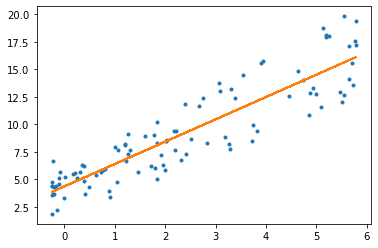

In [177]:
#X_poly = np.concatenate( (X**2, X, np.ones((m,1))),axis= 1)  # same with the code below 
X_poly = np.concatenate( (X**2, X),axis= 1)  # same with the code below 
print(X_poly.shape, X_poly[0])

plt.plot(X_poly.sum(axis=1), y, '.')

p1 = np.polyfit(X_poly.sum(axis=1), y,1) # 샘플을 만족하는 다항식 계수를 반환
print(p1)
plt.plot(X_poly.sum(axis=1), np.polyval(p1, X_poly.sum(axis=1)))


#### scikit-learn API

In [52]:
from sklearn.preprocessing  import PolynomialFeatures

x = np.arange(10).reshape(-1,1)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(x)
poly.transform(x)

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.],
       [ 5., 25.],
       [ 6., 36.],
       [ 7., 49.],
       [ 8., 64.],
       [ 9., 81.]])

[1.05804829] [1.05804829 1.11946618]
[4.84251438] [[3.05557992 2.03685937]]
[2.03685937 3.05557992 4.84251438]


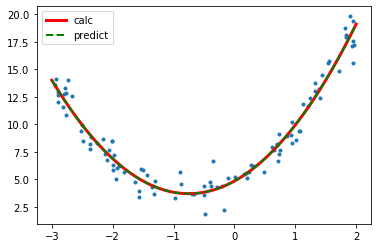

In [183]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.plot(X, y, '.')

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0])

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

X_range = np.linspace(-3, 2, 100).reshape(100, 1)
coef = np.zeros(3)
coef[:2] = lin_reg.coef_[0,::-1]#, lin_reg.intercept_
coef[2] = lin_reg.intercept_
print(coef)
y_calc = np.polyval(coef, X_range )

y_pred =lin_reg.predict(poly_features.transform(X_range))
plt.plot(X_range, y_calc, "r-", label="calc", lineWidth=3)
plt.plot(X_range, y_pred, 'g--', lineWidth=2, label="predict")

plt.legend()
plt.show()

### 다항 회귀와 과적합

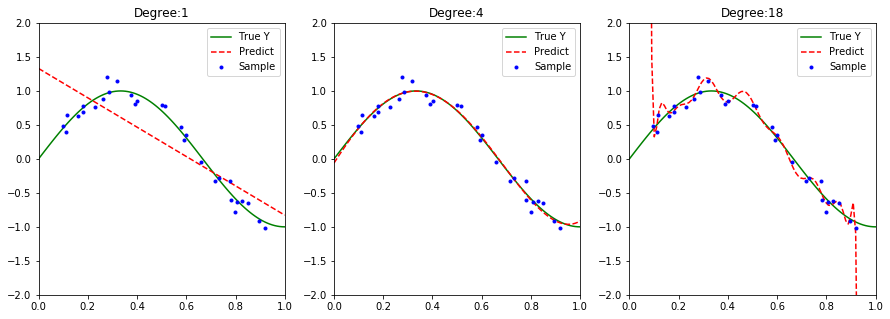

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def sin(X):
    return np.sin(1.5 * np.pi * X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

degrees = (1, 4, 18)
plt.figure(figsize=(15,5))

for i, degree  in enumerate(degrees):
    polynomial = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    pipe = Pipeline([('polynomial', polynomial), ('linear_regression', lr)])
    pipe.fit(X.reshape(-1,1), y)
    
    X_test = np.linspace(0,1, 100)
    plt.subplot(1, len(degrees), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]), 'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:{degree}")
    
plt.show()

### Ridge(릿지) 모델

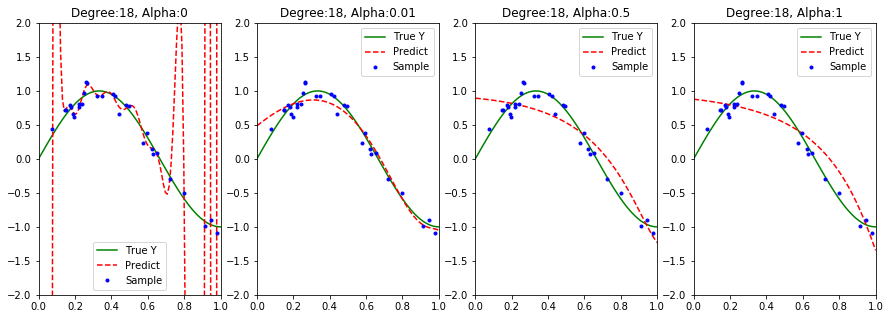

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

def sin(X):
    return np.sin(1.5 * np.pi * X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1


alphas = (0, 0.01, 0.5, 1)
plt.figure(figsize=(15,5))

for i, alpha  in enumerate(alphas):
    polynomial = PolynomialFeatures(degree=18)
    ridge = Ridge(alpha=alpha)
    pipe = Pipeline([('polynomial', polynomial), ('ridge', ridge)])
    pipe.fit(X.reshape(-1,1), y)
    
    X_test = np.linspace(0,1, 100)
    plt.subplot(1, len(alphas), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]), 'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:18, Alpha:{alpha}")
    
plt.show()

### Ridge 모델, 보스턴 주택 가격 실습

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

y_target = boston.target
X_data = boston.data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=1)

alphas = (0.05, 0.1, 0.5, 1, 2)
coef_df = pd.DataFrame()

for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)

    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    print(f'alpha: {alpha},  MSE:{mse:.3f}, RMSE:{rmse:.3f}, R2:{r2:.3f}')
    series = pd.Series(data=ridge.coef_, index=boston.feature_names)
    coef_df[f'alpha: {alpha}'] = series 

display(coef_df)

alpha: 0.05,  MSE:19.758, RMSE:4.445, R2:0.784
alpha: 0.1,  MSE:19.696, RMSE:4.438, R2:0.785
alpha: 0.5,  MSE:19.427, RMSE:4.408, R2:0.788
alpha: 1,  MSE:19.334, RMSE:4.397, R2:0.789
alpha: 2,  MSE:19.344, RMSE:4.398, R2:0.789


,alpha: 0.05,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 2
CRIM,-0.097745,-0.097016,-0.092849,-0.089935,-0.087072
ZN,0.060891,0.060990,0.061579,0.062035,0.062580
INDUS,0.054883,0.050949,0.028312,0.012140,-0.004495
CHAS,2.423895,2.409210,2.316241,2.234261,2.117043
NOX,-20.543194,-19.693077,-14.794189,-11.283815,-7.650521
RM,2.806149,2.815508,2.866142,2.896189,2.913409
AGE,0.002799,0.002089,-0.001970,-0.004815,-0.007618
DIS,-1.502975,-1.490777,-1.420452,-1.369990,-1.317549
RAD,0.305303,0.303256,0.291640,0.283653,0.276109
TAX,-0.011368,-0.011450,-0.011927,-0.012283,-0.012682


### LASSO(라쏘) 모델


#### 보스턴 주택가격, 계수 제거 실습

In [23]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

y_target = boston.target
X_data = boston.data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=1)

alphas = (0.05, 0.1, 0.5, 1, 2)
coef_df = pd.DataFrame()

for i, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)

    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    print(f'alpha: {alpha},  MSE:{mse:.3f}, RMSE:{rmse:.3f}, R2:{r2:.3f}')
    series = pd.Series(data=lasso.coef_, index=boston.feature_names)
    coef_df[f'alpha: {alpha}'] = series 

display(coef_df)

alpha: 0.05,  MSE:19.639, RMSE:4.432, R2:0.786
alpha: 0.1,  MSE:20.225, RMSE:4.497, R2:0.779
alpha: 0.5,  MSE:23.919, RMSE:4.891, R2:0.739
alpha: 1,  MSE:30.294, RMSE:5.504, R2:0.669
alpha: 2,  MSE:35.409, RMSE:5.951, R2:0.614


,alpha: 0.05,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 2
CRIM,-0.084317,-0.079892,-0.068740,-0.052568,-0.006269
ZN,0.062888,0.063790,0.062473,0.059043,0.038423
INDUS,-0.009529,-0.026372,-0.000000,-0.000000,-0.000000
CHAS,1.600037,0.894885,0.000000,0.000000,0.000000
NOX,-5.160678,-0.000000,-0.000000,-0.000000,-0.000000
RM,2.862346,2.788615,1.569403,0.000000,0.000000
AGE,-0.007882,-0.009812,0.003097,0.019650,0.032338
DIS,-1.257021,-1.157272,-0.900161,-0.576754,-0.000000
RAD,0.272990,0.266413,0.261334,0.233009,0.091344
TAX,-0.013188,-0.014079,-0.014023,-0.012307,-0.006387


## Logistic Regression


#### Sigmoid 함수 그리기

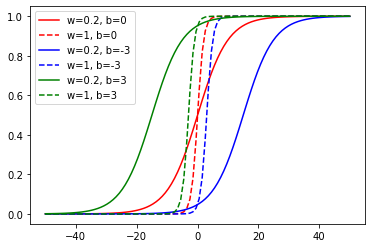

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return  1/(1+np.exp(-z))

def drawSigmoid(w=0.5, b=0, style='-', label=None, x=None):
    if x is None :
        x=np.linspace(-50,50,100).reshape(-1,1)
    else:
        x = np.linspace(np.min(x), np.max(x), 100).reshape(-1,1)
    
    y = sigmoid(x * w + b)
    plt.plot(x, y, style, label=label)
    
drawSigmoid(0.2,  0, 'r', label="w=0.2, b=0")
drawSigmoid(  1,  0, 'r--', label='w=1, b=0')

drawSigmoid(0.2, -3, 'b', label='w=0.2, b=-3')
drawSigmoid(  1, -3, 'b--', label='w=1, b=-3')

drawSigmoid(0.2,  3, 'g', label='w=0.2, b=3')
drawSigmoid(  1,  3, 'g--', label='w=1, b=3')
plt.legend()

#### 로지스틱 회귀 실습: 랜덤수 분류

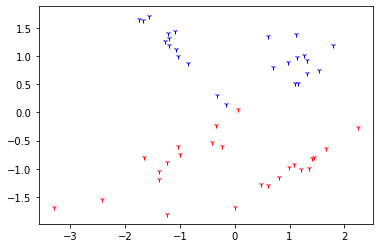

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2,
                           n_informative =2, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0)

plt.plot(X[y==0][:,0],X[y==0][:,1], 'r1')
plt.plot(X[y==1][:,0],X[y==1][:,1], 'b1')

accuracy:1.0


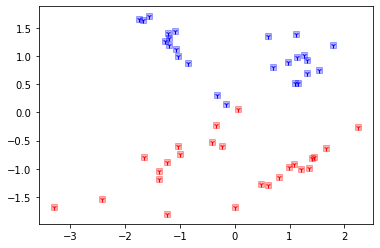

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
lr_clf.fit(X, y)
predict = lr_clf.predict(X)

print(f'accuracy:{accuracy_score(y, predict)}')

plt.plot(X[y==0][:,0],X[y==0][:,1], 'r1')
plt.plot(X[y==1][:,0],X[y==1][:,1], 'b1')

plt.plot(X[predict==0][:,0],X[predict==0][:,1], 'rs', alpha=0.3)
plt.plot(X[predict==1][:,0],X[predict==1][:,1], 'bs', alpha=0.3)

### 분류 평가 지표

In [15]:
import numpy as np, cv2
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

np.random.seed(0)
n=100
X1 = np.random.randint(0,10, (n))
y = np.zeros(n)
y[X1 == 5] = 1

X2 = np.random.randint(0,10, (n))
pred = np.zeros(n)
pred[X2 == 5] = 1

accuracy = np.sum([y==pred]) /n

print(f'accuracy: {accuracy*100:.2f}%')
print(f'accuracy: {accuracy_score(y, pred)*100:.2f}%')
print(confusion_matrix(y, pred))

accuracy: 85.00%
accuracy: 85.00%
[[84  5]
 [10  1]]


In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

accuracy = accuracy_score(y, pred)
precision = precision_score(y, pred)
recall = recall_score(y, pred)

print(f'accuracy:{accuracy}, precision:{precision}, recall:{recall}')

accuracy:0.85, precision:0.16666666666666666, recall:0.09090909090909091


In [21]:
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
y =    [0,0,1,1,0,0,1,1]
pred1 = [0,0,0,1,1,0,1,1]
pred2 = [0,0,1,0,0,0,0,0]
pred3 = [1,1,1,1,1,1,1,1]
for pred in [pred1, pred2, pred3]:
    print(confusion_matrix(y, pred))
    accuracy = accuracy_score(y, pred)
    precision = precision_score(y, pred)
    recall = recall_score(y, pred1)
    f1 = f1_score(y, pred)
    print(f'accuracy:{accuracy}, precision:{precision}, recall:{recall}, f1: {f1}')

[[3 1]
 [1 3]]
accuracy:0.75, precision:0.75, recall:0.75, f1: 0.75
[[4 0]
 [3 1]]
accuracy:0.625, precision:1.0, recall:0.75, f1: 0.4
[[0 4]
 [0 4]]
accuracy:0.5, precision:0.5, recall:0.75, f1: 0.6666666666666666


#### 로지스틱 회귀 실습: 위스콘신 유방암 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
scaler = StandardScaler()
scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(scaled, cancer.target, random_state=0)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

print(f'train acc:{lr_clf.score(X_train, y_train)*100:.2f}, \
        test acc:{accuracy_score(y_test, pred)*100:.2f}%')

train acc:99.06, test acc:96.50%
